## Lesson 9: Gordon McCulloh, 5 September 2018

The tips.csv dataset contains data on tips collected from a restaurant. 

a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found. 

b. Repeat part a, but broken down by time

In [3]:
# Loading the appropriate packages and tables
import numpy as np
import matplotlib
import datascience as ds
import pandas
from datascience import Table
from collections import Counter
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')

Tips = ds.Table.read_table("tips.csv")
Tips # output for visualization

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
Mean_Tip_F= np.average(Tips.where("sex",ds.are.equal_to("Female")).column("tip"))
Mean_Tip_M = np.average(Tips.where("sex",ds.are.equal_to("Male")).column("tip"))
print("The mean tip for females is: $", np.round(Mean_Tip_F,2),". The mean tip for males is: $", np.round(Mean_Tip_M,3),".")

The mean tip for females is: $ 2.83 . The mean tip for males is: $ 3.09 .


C:\Users\C20Gordon.McCulloh\Documents\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


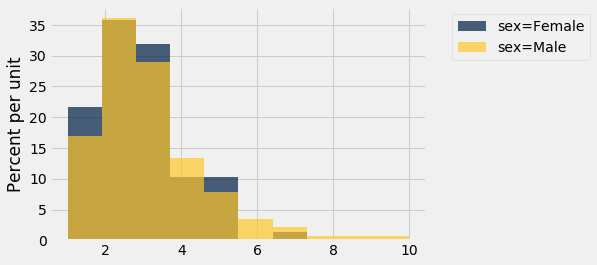

In [5]:
Tips.hist("tip",group="sex")

We found that Python will export a histogram if and only if the correct grouping syntax is used. Even then, it still spits out a warning box due to the nature of the data in the tips table. With respect to the data, we find that males, on average, earn a larger tip than females. Males also have a higher probability of receiving a large type above $5, according the right-skewed nature of the data.

In [6]:
Mean_Tip_L= np.average(Tips.where("time",ds.are.equal_to("Lunch")).column("tip"))
Mean_Tip_D = np.average(Tips.where("time",ds.are.equal_to("Dinner")).column("tip"))
print("The mean tip for lunch is: $", np.round(Mean_Tip_L,2),". The mean tip for dinner is: $", np.round(Mean_Tip_D,3),".")

The mean tip for lunch is: $ 2.73 . The mean tip for dinner is: $ 3.103 .


C:\Users\C20Gordon.McCulloh\Documents\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


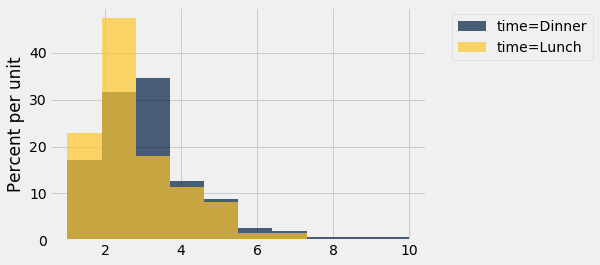

In [7]:
Tips.hist("tip",group="time")

From the mean data and the histogram, we can see that people are more likely to leave a higher tip for dinner than they are for lunch. 

Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2,..., Sun = 7).

Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num.

In [8]:
# Python has a modified version of switch/case statements. This is what I found:
def weekday_to_num(day):
    switch = {
        "Mon": 1,
        "Tues": 2,
        "Wed": 3,
        "Thur": 4,
        "Fri": 5,
        "Sat": 6,
        "Sun": 7
    }
    return switch.get(day,"false!")

In [10]:
Tips = Tips.with_column("weekday_num",Tips.apply(weekday_to_num,"day"))
Tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at "nearby" values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill vlaue of 20, we will simply look at all total bills near 20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider "nearby". For example, for a window of 1, we will look at all bills totalling 19 through 21. The output of this function will be the predicted tip amount.

In [13]:
def est_tip(total_bill,window): # allows us to set the window size
    Range = Tips.where("total_bill", ds.are.above(total_bill-window)).where("total_bill",ds.are.below(total_bill+window))
    return np.sum(Range.column("tip"))/Range.num_rows

Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount.

In [16]:
Tips = Tips.with_column("est_tip",Tips.apply(lambda x: est_tip(x,1),"total_bill")) # setting the window to be 1
Tips

total_bill,tip,sex,smoker,day,time,size,weekday_num,est_tip
16.99,1.01,Female,No,Sun,Dinner,2,7,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,7,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,7,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,7,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,7,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,7,4.19909
8.77,2,Male,No,Sun,Dinner,2,7,1.865
26.88,3.12,Male,No,Sun,Dinner,4,7,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,7,2.426
14.78,3.23,Male,No,Sun,Dinner,2,7,2.43833


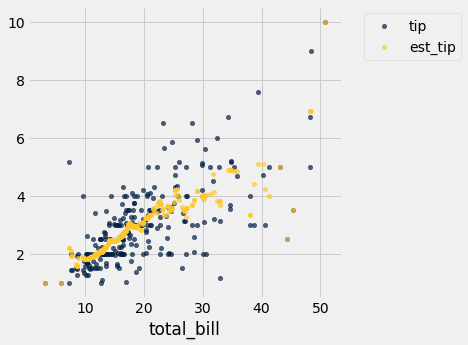

In [17]:
Tips.select("total_bill","tip","est_tip").scatter("total_bill")